In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import scipy
import math
from FPGATestIO import *

# Single Tones With Hannings

In [2]:
AMPLITUDE = 2**8 # Some fraction of the +-2**11 range
tone_samps = {}
for freq_MHz in range(0,1500,5):
    tone_samps[freq_MHz] = gen_tone(freq_MHz,amplitude=AMPLITUDE, out_format="001_files/inputs/input_%d_MHz_%d_zpclocks_hanning.dat")

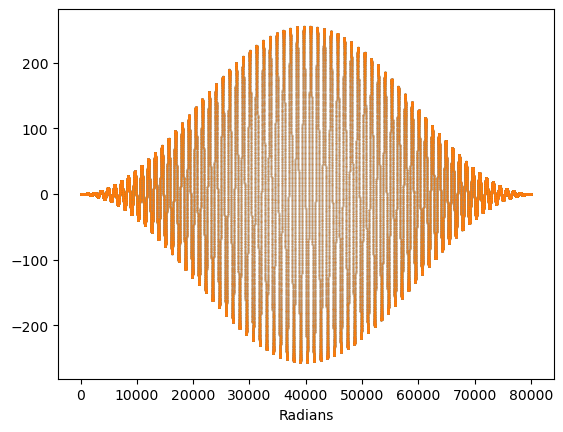

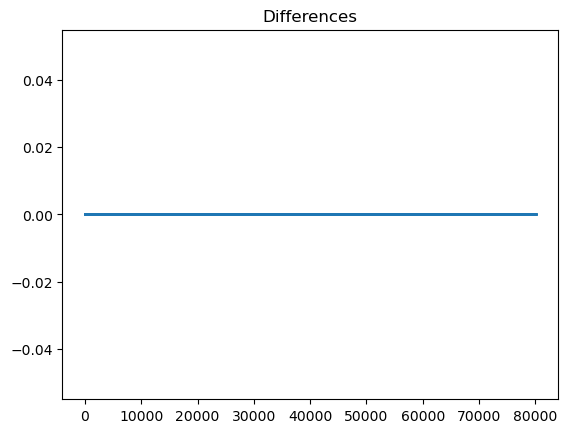

In [3]:
tone_from_file = import_data("001_files/inputs/input_5_MHz_4_zpclocks_hanning.dat")
plt.plot(range(len(tone_samps[5])), tone_samps[5], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(tone_from_file)), tone_from_file, linestyle="None", marker=".", markersize=1, alpha=0.3)
# plt.xlim(0,1000)
plt.xlabel("Radians")
plt.show()

plt.plot(range(len(tone_from_file)), np.subtract(tone_from_file, tone_samps[5]), linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.title("Differences")
plt.show()

# Gaussian Noise, No Tone

In [9]:
gauss_samps = {}
for noise_size in range(50,1001,50):#range(50,1001, 50):
    gauss_samps[noise_size] = []
    for counter in range(100):#range(100):
        gauss_samps[noise_size].append(gen_gauss_noise(noise_size=noise_size, counter=counter, 
                                                       out_format="001_files/inputs/gauss_input_%d_sigma_hanning_clipped_%d.dat"))

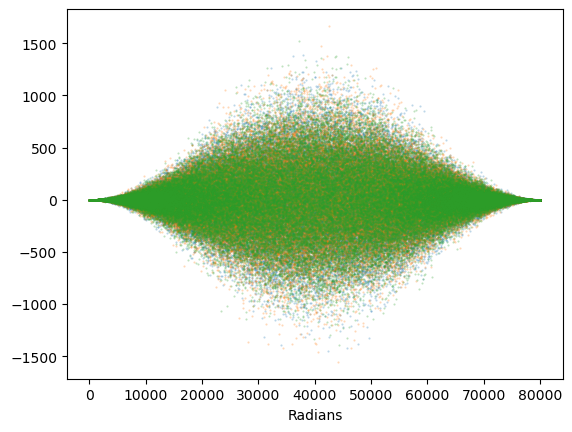

In [10]:
plt.plot(range(len(gauss_samps[400][0])), gauss_samps[400][0], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(gauss_samps[400][1])), gauss_samps[400][1], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(gauss_samps[400][2])), gauss_samps[400][2], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.xlabel("Radians")
plt.show()

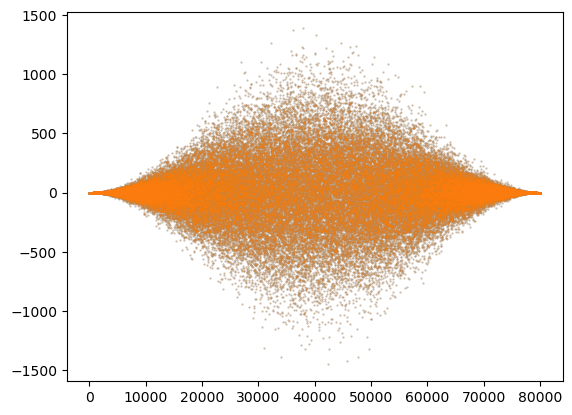

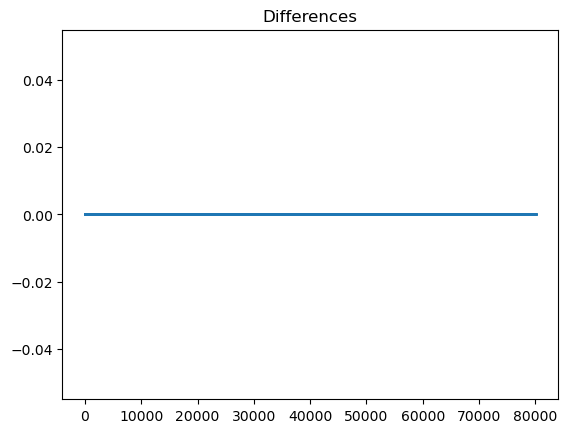

In [11]:
gauss_from_file = import_data("001_files/inputs/gauss_input_400_sigma_hanning_clipped_0.dat")
plt.plot(range(len(gauss_samps[400][0])), gauss_samps[400][0], linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.plot(range(len(gauss_from_file)), gauss_from_file, linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.show()

plt.plot(range(len(gauss_from_file)), np.subtract(gauss_from_file, gauss_samps[400][0]), linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.title("Differences")
plt.show()

# Impulse

In [7]:
imp_samps = {}
for imp_size in range(0,12, 1):
    imp_samps[imp_size] = gen_pulse(impulse_size=2**imp_size, out_format="001_files/inputs/pulse_input_height_%d_clipped.dat")

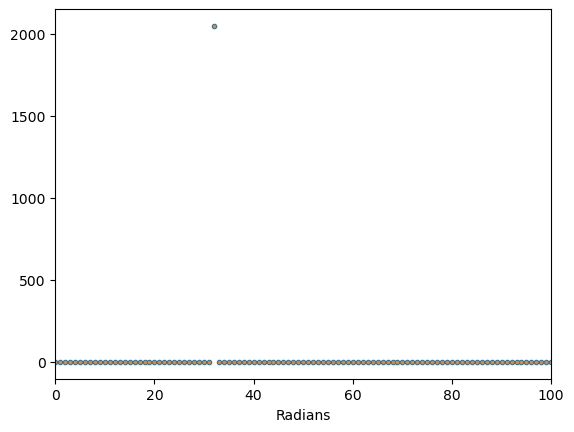

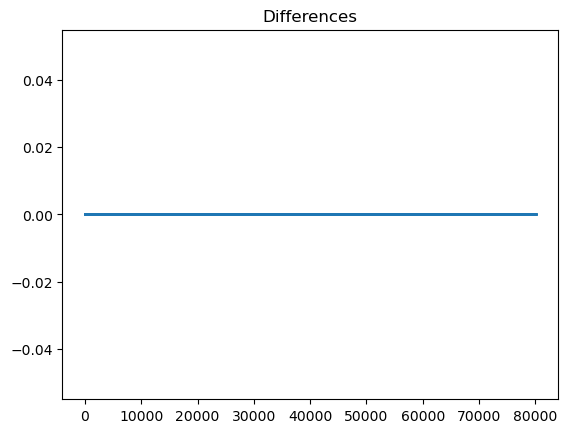

In [8]:
pulse_from_file = import_data("001_files/inputs/pulse_input_height_2048_clipped.dat")
plt.plot(range(len(imp_samps[11])), imp_samps[11], linestyle="None", marker=".")
plt.plot(range(len(pulse_from_file)), pulse_from_file, linestyle="None", marker=".", markersize=3)
plt.xlabel("Radians")
plt.xlim(0,100)
plt.show()

plt.plot(range(len(pulse_from_file)), np.subtract(pulse_from_file, imp_samps[11]), linestyle="None", marker=".", markersize=1, alpha=0.3)
plt.title("Differences")
plt.show()